In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Exercise 1

#### a) Formulate the minimum energy optimal control problem as a least norm problem minimize$||x||^2$ subject to Cx = d. Clearly state what the variables x, and the problem data C and d are.

$$\begin{bmatrix} s_1(t+1)\\ s_2(t+1) \end{bmatrix} = \begin{bmatrix} 1&1\\ 0&0.95 \end{bmatrix}\begin{bmatrix} s_1(t)\\ s_2(t) \end{bmatrix}+ \begin{bmatrix} 0\\ 0.1 \end{bmatrix} u(t),\;\;\;\; t=0,1,2,...N $$
where $s_1(t)$ is position, $s_2(t)$ is the velocity and u(t) is the actuator input. Also, $s_1(0)=0$ and $s_2(0)=0$. Lastly, the input sequence must satisfy the constraints $s_1(N)=10 $ and $s_2(N)=0$

We have to minimize $||x||^2$ subject to Cx=d. The variable x is a vector with shape (N,1) which contains each different u(t) for each time t=0,..,N-1    $x=\begin{bmatrix} u(0)\\ u(1) \\ ... \\ u(N-1) \end{bmatrix}$ .

The vector d contains the constraints for final position and velocity. Its shape is (2,1). $d=\begin{bmatrix} 10\\ 0 \end{bmatrix}$

Finally, we have to construct the matrix C. Matrix C contains the coefficients of $s_1(N)$ in the first row and the coefficients of $s_2(N)$ in the second row. The shape of the matrix is (2,N).  We calculate from the given information that $s_1(t+1)=s_1(t)+s_2(t)$ and $ s_2(t+1)=0.95s_2(t)+0.1u(t)$ .
To understand the "pattern" of the coefficients for different N, we can calculate $s_1(t)$ and $s_2(t)$ for different values of t. Hence:

For velocity:
$s_2(0)=0\\
s_2(1)=0.1u(0)\\
s_2(2)=0.95s_2(1)+0.1u(1)=0.95*0.1u(0)+0.1u(1)\\
s_2(3)=0.95s_2(2)+0.1u(2)=0.95^2 * 0.1u(0)+0.95*0.1u(1)+0.1u(2)$
We end up with an equation of $ \sum_{t=0}^{N-1}0.95^{N-1-t}*0.1u(t)$ so the coefficients of this equation construct the second row of matrix C.

For position:
$s_1(0)=0\\
s_1(1)=0\\
s_1(2)=s_1(1)+s_2(1)=0.1u(0)\\
s_1(3)=s_1(2)+s_2(2)=(0.95*0.1+0.1)u(0)+0.1u(1)\\
s_1(4)=s_1(3)+s_2(3)=(0.95^2*0.1+0.95*0.1+0.1)u(0)+(0.95*0.1+0.1)u(1)+0.1u(2)$

We observe that the coefficient of u(N-1) is 0, of u(N-2) is 0.1, of u(N-3) is the aforementioned coefficient by adding 0.95*0.1 and the pattern follows by adding $0.95^i *0.1$ each time. It should be noted that these coefficients can easily be calculated from the last one to the first one with regards to the order on the first row of the matrix.

The first row of matrix C multiplied by vector u(t) is equal to the final position of the car which should be equal to 10. The second row of matrix C multiplied by vector u(t) is equal to the final velocity of the car which should be equal to 0. 

The problem states that we have to minimize the total energy consumed given by $E=\sum_{t=0}^{N-1}u(t)^2$. We can find the optimal u(t) vector by solving Cx=d or else $x=C^T(CC^T)^{-1}d=C(pseudo-inverse)d$.

It is important to be noted that we should use the pseudo-inverse matrix of C instead of the inverse.

In [7]:
#Vector d
d=np.array([10,0]).T

#Define function that creates the matrix C for an input t=N
#The row for s2 is calculated as it was described previously
#The row for s1 is calculated as it was described previously and by updating the s1 from the last value to the first to correct the order

def C_matrix(N):
    s1=[0]
    s2=[]
    for i in range(N):
        s2.append((0.95**(N-1-i))*0.1)
    start=0.1    
    for i in range(N-1):
        s1.append(start)
        start=start+(0.95**(i+1))*0.1  
    s1_=[s1[i] for i in range(N-1,-1,-1)]
    C=np.row_stack((s1_,s2))
    return C

#### b) Solve the problem for N = 30. Plot the optimal u(t), the resulting position s1(t), and velocity s2(t).

In [9]:
#Calculate matrix C for N=30
C=C_matrix(30)

#Find the optimal vector u(t) by using the pseudo-inverse, which minimizes the problem where x=u(t)
x=np.dot(np.linalg.pinv(C),d)

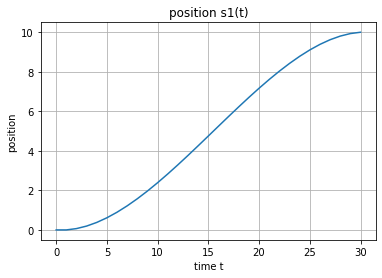

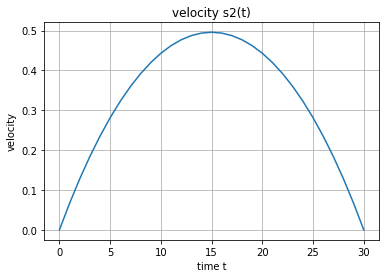

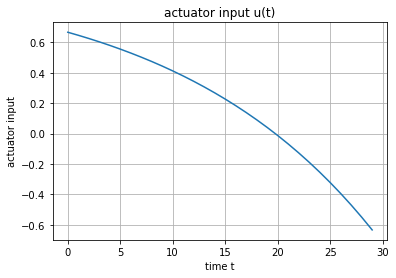

In [17]:
#Find s1 and s2 for each time t=1,2,..,N=30
s1plot=[]
s2plot=[]
for i in range(len(x)+1):
    Cplot=C_matrix(i)
    s1plot.append(Cplot[0,:].dot(x[:i]))
    s2plot.append(Cplot[1,:].dot(x[:i]))

#Plot s1(t)
plt.plot(s1plot)
plt.title('position s1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot s2(t)
plt.plot(s2plot)
plt.title('velocity s2(t)')
plt.ylabel('velocity')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot u(t)
plt.plot(x)
plt.title('actuator input u(t)')
plt.ylabel('actuator input')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

We observe that actuator input falls from 0.6 to -0.6 as time passes. Also, position s1 goes from zero to 10 as expected and velocity s2 from zero to 0.5 to finally zero as expected.

#### c) Solve the problem for N = 2, 3, ..., 29. For each N calculate the energy E consumed by the optimal input sequence. Plot E versus N. (The plot looks best if you use a logarithmic scale for E)

In [24]:
#Calculate energy E for each N=2,3,...,29
E=[]
for i in range(2,30):
    C=C_matrix(i)
    x=np.dot(np.linalg.pinv(C),d)
    E.append(np.linalg.norm(x,2)**2)

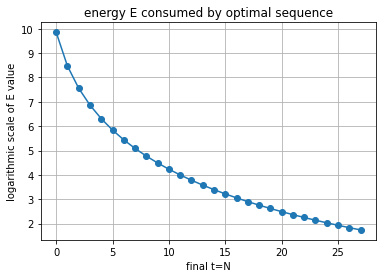

In [26]:
#Plot the logarithmic E versus N
plt.plot(np.log(E),marker='o')
plt.title('energy E consumed by optimal sequence')
plt.xlabel('final t=N')
plt.ylabel('logarithmic scale of E value')
plt.grid(which='major')
plt.show()

The logarithm of the value of energy consumed by optimal sequence is dropping from 10 to almost zero as N gets bigger. The more time the car has available, the less energy it needs to get to position s1(N) =10.

#### d) Suppose we allow the final position to deviate from 10. However, if $s_1(N)\not=10$ we have to pay a penalty, equal to $(s_1(N) − 10)^2$. The problem is to find the input sequence that minimizes the sum of the energy E consumed by the input and the terminal position penalty, $\sum_{t=0}^{N-1}u(t)^2+(s_1(N) − 10)^2$ subject to the constraint $s_2(N) = 0$. Formulate this problem as a least norm problem, and solve it for N = 30. Plot the optimal input signals $u(t)$, the resulting position $s_1(t)$ and the resulting velocity $s_2(t)$.

For this question we need to minimize $||Ax-B||{2}$ subject to the constraint $s_2(N)=0$. 


$$\begin{bmatrix} Ax-B \end{bmatrix} = \begin{bmatrix} 1&0&0&0&...\\ 0&1&0&0&...\\...&...&...&...&...\\&&s_1(N) coefficients&& \end{bmatrix}\begin{bmatrix} u(0)\\ (u1)\\u(...)\\u(N-1) \end{bmatrix}- \begin{bmatrix} 0\\ 0\\...\\10 \end{bmatrix} $$

x is the same vector with shape (30,1) that includes all the optimal u(t) for t=0,1,...,29. The B vector has a shape of (31,1) and all its values are zero except the last one which is 10. Lastly, the matrix A is the identity matrix with shape (30,30) but with the addition of an extra row that consists of the coefficients of $s_1(N)$. Hence, A matrix has the shape of (31,30). By calculating Ax-B, we observe that we end up with  $\begin{bmatrix} u(0)\\ (u1)\\u(...)\\u(N-1)\\s_1(N) − 10 \end{bmatrix}$, which was our initial goal. For this minimization the minimize solver will be used from scipy.optimize library.

In [28]:
#Create C for N=30
C=C_matrix(30)

#Create identity matrix (30,30)
A=np.eye(30,30)

#Stack an extra row in the identity matrix with the coefficients of s1(N)
A=np.row_stack((A,C[0,:]))

#Create B vector with zeros and 10 as the last value
B=np.zeros((31,))
B[-1]=10

In [29]:
#Define the function that need to be minimized
def ls(x,a,b):
    return (np.linalg.norm(a.dot(x)-b,2))**2

#Define the constraint s2(N)=0
cons = ({'type': 'eq', 'fun':  lambda x:np.dot(C[1,:],x)})

#Run minimize for the problem
U=minimize(ls,args=(A,B),x0=np.ones((30,1)),constraints=cons).x

In [32]:
#Find s1 and s2 for each time t=1,2,..,N=30
s1plot=[]
s2plot=[]
for i in range(len(U)+1):
    Cplot=C_matrix(i)
    s1plot.append(Cplot[0,:].dot(U[:i]))
    s2plot.append(Cplot[1,:].dot(U[:i]))

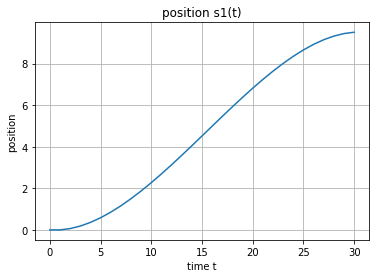

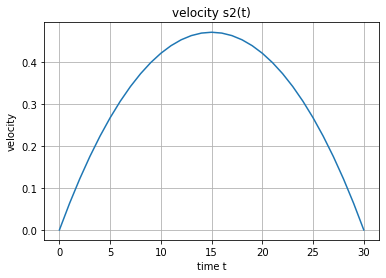

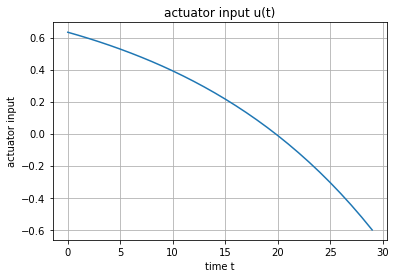

In [33]:
#Plot s1(t)
plt.plot(s1plot)
plt.title('position s1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot s2(t)
plt.plot(s2plot)
plt.title('velocity s2(t)')
plt.ylabel('velocity')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot u(t)
plt.plot(U)
plt.title('actuator input u(t)')
plt.ylabel('actuator input')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

In [39]:
#Calculate final velocity
s2=round(np.dot(C[1,:],U))

#Calulate final position
s1=np.dot(C[0,:],U)

#Calculate the energy consumed by the input and the terminal position penalty
E=np.linalg.norm(U)**2+(np.dot(C[0,:],U)-10)**2

print('The final position is',s1,', the final velocity is',s2,'and the energy consumed by the input and the terminal position penalty is ',E)

The final position is 9.502806395161796 , the final velocity is 0 and the energy consumed by the input and the terminal position penalty is  4.966844937007187


The final position differs from 10 only 0.5. The velocity is zero, as expected from the constraint.

### Exercise 2

####  Formulate the following problem as a least norm problem, and solve it. Find the control inputs u(0), u(1), ., u(19) and v(0), 1),, v(19) that minimize the total energy $\sum_{t=0}^{19}u(t)^2+\sum_{t=0}^{19}v(t)^2$ and satisfy the following three conditions $s_1(20)=p_1 (20)$, $s_2(20) = 0$, $p_2(20) = 0$ In other words, at time t = 20 the two vehicles must have velocity zero, and be at the same position. (The final position itself is not specified, i.e., you are free to choose any value as long as $s_1(20)=p_1(20)$.) Plot the positions $s_1(t)$ and $p_1(t)$ of the two vehicles, for t =1, 2, .. ., 20.

We have to create matrix C2 from the second vehicle, similarly to C1 in question 1.

$$\begin{bmatrix} p_1(t+1)\\ p_2(t+1) \end{bmatrix} = \begin{bmatrix} 1&1\\ 0&0.8 \end{bmatrix}\begin{bmatrix} p_1(t)\\ p_2(t) \end{bmatrix}+ \begin{bmatrix} 0\\ 0.2 \end{bmatrix} v(t) $$
where $p_1(t)$ is position, $p_2(t)$ is the velocity and v(t) is the actuator input for the second vehicle. Also, $p_1(0)=1$ and $p_2(0)=0$. Lastly, the input sequence must satisfy the constraints $s_1(20)=p_1(20) $ and $s_2(20)=p_2(20)=0$

Based on the above and similarly to the first question we construct the matrix C2 which contains the coefficients of $p_1(N)$ in the first row and the coefficients of $p_2(N)$ in the second row. The shape of the matrix is (2,N). We calculate from the given information that $p_1(t+1)=p_1(t)+p_2(t)$ and $ p_2(t+1)=0.8p_2(t)+0.12v(t)$ .
To understand the "pattern" of the coefficients for different N, we can calculate $p_1(t)$ and $p_2(t)$ for different values of t. Hence:
For velocity:
$p_2(0)=0\\
p_2(1)=0.2v(0)\\
p_2(2)=0.8s_2(1)+0.2v(1)=0.8*0.2v(0)+0.2v(1)\\
p_2(3)=0.8p_2(2)+0.2v(2)=0.8^2 * 0.2v(0)+0.8*0.2v(1)+0.2v(2)$
We end up with an equation of $ \sum_{t=0}^{N-1}0.8^{N-1-t}*0.2v(t)$ so the coefficients of this equation construct the second row of matrix C2.

For position:
$p_1(0)=1\\
p_1(1)=1\\
p_1(2)=p_1(1)+p_2(1)=1+0.2v(0)\\
p_1(3)=p_1(2)+p_2(2)=1+(0.8*0.2+0.2)v(0)+0.2v(1)\\
p_1(4)=p_1(3)+p_2(3)=1+(0.8^2*0.2+0.8*0.2+0.2)v(0)+(0.8*0.2+0.2)v(1)+0.2v(2)$

We observe that the coefficient of v(N-1) is 0, of v(N-2) is 0.v, of v(N-3) is the aforementioned coefficient by adding 0.8*0.2 and the pattern follows adding $0.8^i *0.2$ each time. It should be noted that these coefficients can easily be calculated from the last one to the first one with regards to the order on the first row of the matrix. Also, there is an extra addition of number 1 that cannot be applied in any coefficient. This "1" will be substructed from the final position constraint (final position $p_1(N)=9$ instead of 10) and we will assume that the vehicle starts from $p_1(0)=0$.

We have to minimize the total energy $\sum_{t=0}^{19}u(t)^2+\sum_{t=0}^{19}v(t)^2$ subject to the aforementioned constraints. 
To do that we can minimize $||Ax-B||{2}$ subject to the constraints.

$$\begin{bmatrix} Ax-B \end{bmatrix} = \begin{bmatrix} 1&0&0&0&...\\ 0&1&0&0&...\\...&...&...&...&...\\...&0&0&0&1 \end{bmatrix}\begin{bmatrix} u(0)\\ u(1)\\u(...)\\u(N-1)\\v(0)\\v(1)\\v(...)\\v(N-1) \end{bmatrix}- \begin{bmatrix} 0\\ 0\\...\\0 \end{bmatrix} $$

The variable x is a vector with shape (40,1) which contains all the optimal u(t) and v(t) for each time t=0,..,N-1. The B vector has a shape of (40,1) and all its values are zero. Lastly, the matrix A is the identity matrix with shape (40,40). For this minimization the minimize solver will be used from scipy.optimize library.

Also, we will pad zeros on the right side of matrix C1, so it will have a shape of (2,40). Similarly, we will pad zeros on the left side of matrix C2, so it will have shape (2,40). The reason of this padding is to calculate $s_1(t)$, $s_2(t)$, $p_1(t)$ and $p_2(t)$, as the vector x contains both u(t) and v(t). These calculations are needed for our constraints.

In [51]:
#Define function that creates the matrix C2 for an input t=N
#The row for p2 is calculated as it was described previously
#The row for p1 is calculated as it was described previously and by updating the p1 from the last value to the first to correct the order
def C2_matrix(N):
    s1=[0]
    s2=[]
    for i in range(N):
        s2.append((0.8**(N-1-i))*0.2)
    start=0.2    
    for i in range(N-1):
        s1.append(start)
        start=start+(0.8**(i+1))*0.2  
    s1_=[s1[i] for i in range(N-1,-1,-1)]
    C=np.row_stack((s1_,s2))
    return C


#Construct C1 and pad zeros on the right. Shape(2,40)
C1=C_matrix(20)
C1=np.column_stack((C1,np.zeros((2,20))))

#Construct C2 and pad zeros on the left. Shape(2,40)
C2=C2_matrix(20)
C2=np.column_stack((np.zeros((2,20)),C2))

#Construct identity matrix with shape(40,40)
A=np.eye(40,40)

#Construct a vector with zeros with shape (40,1)
B=np.zeros((40,))

#Define the function that needs to be minimized
def ls(x,a,b):
    return np.linalg.norm(a.dot(x)-b,2)**2

#Define the constraints s1(N)=10,p1(N)=10,s2(n)=0,p2(n)=0
cons = ({'type': 'eq', 'fun': lambda x: np.dot(C1[0,:],x)-10},{'type': 'eq', 'fun': lambda x: np.dot(C2[0,:],x)-9},{'type': 'eq', 'fun': lambda x: np.dot(C1[1,:],x)},{'type': 'eq', 'fun': lambda x: np.dot(C2[1,:],x)})

#Run minimize for the problem
X=minimize(ls,args=(A,B),x0=np.zeros((40,)),constraints=cons).x

In [52]:
s1=(np.dot(C1[0,:],X))
s2=np.dot(C1[1,:],X)
p1=np.dot(C2[0,:],X)+1
p2=np.dot(C2[1,:],X)
E=(np.linalg.norm(X,2))**2
print(s1,s2,p1,p2,E)

10.000000014427918 -1.2247572817036811e-09 9.999999916332744 -7.771934970590699e-10 23.020243176079365


As expected the final position for vehicle 1 and 2 is 10 and the velocity is zero. Also, the total energy is 23.02.

It should be noted that vehicle 2 starts from position 1 in t=0, so we should add "1" in the final position. This way the two vehicles have the same final position. (the constraint for vehicle 2 for position was 9 instead of 10)

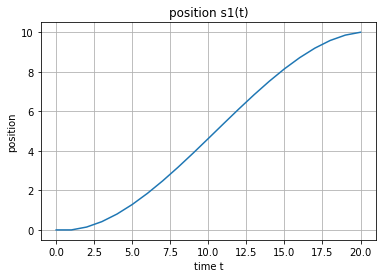

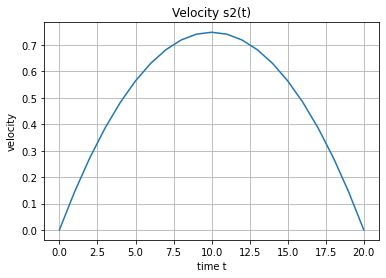

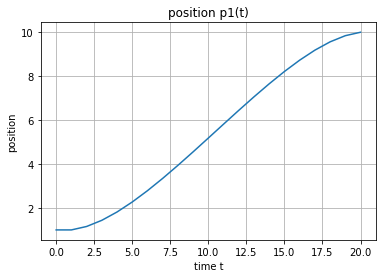

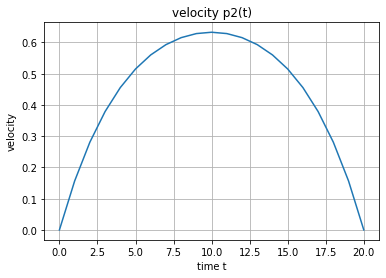

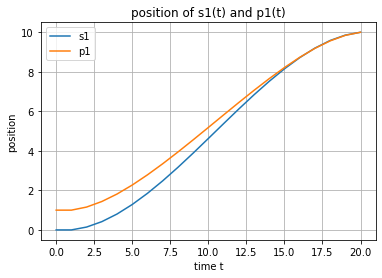

In [53]:
#Find s1, s2, p1, p2 for each time t=1,2,..,N=30
s1plot=[]
s2plot=[]
p1plot=[]
p2plot=[]
for i in range(21):
    C1plot=C_matrix(i)
    C2plot=C2_matrix(i)
    s1plot.append(C1plot[0,:].dot(X[:i]))
    s2plot.append(C1plot[1,:].dot(X[:i]))
    p1plot.append(C2plot[0,:].dot(X[20:i+20])+1)
    p2plot.append(C2plot[1,:].dot(X[20:i+20]))

#Plot s1
plt.plot(s1plot)
plt.title('position s1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot s2
plt.plot(s2plot)
plt.title('Velocity s2(t)')
plt.ylabel('velocity')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot p1
plt.plot(p1plot)
plt.title('position p1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot p2
plt.plot(p2plot)
plt.title('velocity p2(t)')
plt.ylabel('velocity')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot s1 and p1 together
plt.plot(s1plot,label='s1')
plt.plot(p1plot,label='p1')
plt.title('position of s1(t) and p1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.legend()
plt.show()

#### Below we run the same problem, but the constraint of $s_1(N)=p_1(N)=10$ changes to $s_1(N)=p_1(N)$. This means we do not specify a final position and try to find the optimal, so that the energy will be minimized.

In [44]:
#Define the constraints (but with s1(N)=s2(N) and s2(n)=0,p2(n)=0)
cons = ({'type': 'eq', 'fun': lambda x: (np.dot(C1[0,:],x))-((np.dot(C2[0,:],x)+1))},{'type': 'eq', 'fun': lambda x: np.dot(C1[1,:],x)},{'type': 'eq', 'fun': lambda x: np.dot(C2[1,:],x)})

#Run minimize for the problem
X=minimize(ls,args=(A,B),x0=np.zeros((40,)),constraints=cons).x

In [45]:
s1=(np.dot(C1[0,:],X))
s2=np.dot(C1[1,:],X)
p1=np.dot(C2[0,:],X)+1
p2=np.dot(C2[1,:],X)
E=(np.linalg.norm(X,2))**2
print(s1,s2,p1,p2,E)

0.36108185121313585 -6.219356626924188e-13 0.36108184977066216 -1.554544687421e-12 0.05701999125351


As expected the final position for vehicle 1 and 2 is the same at 0.36 and the velocity is zero. Also, the total energy is 0.05.

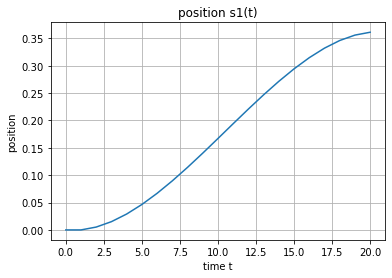

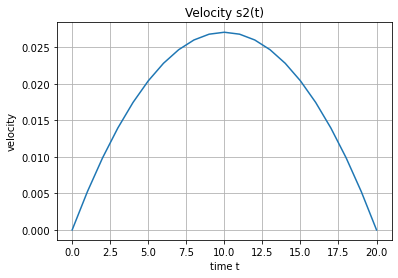

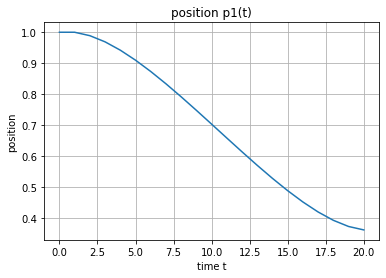

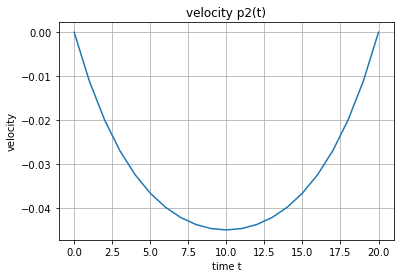

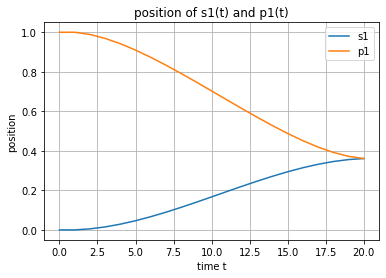

In [50]:
#Find s1, s2, p1, p2 for each time t=1,2,..,N=30
s1plot=[]
s2plot=[]
p1plot=[]
p2plot=[]
for i in range(21):
    C1plot=C_matrix(i)
    C2plot=C2_matrix(i)
    s1plot.append(C1plot[0,:].dot(X[:i]))
    s2plot.append(C1plot[1,:].dot(X[:i]))
    p1plot.append(C2plot[0,:].dot(X[20:i+20])+1)
    p2plot.append(C2plot[1,:].dot(X[20:i+20]))

#Plot s1
plt.plot(s1plot)
plt.title('position s1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot s2
plt.plot(s2plot)
plt.title('Velocity s2(t)')
plt.ylabel('velocity')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot p1
plt.plot(p1plot)
plt.title('position p1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot p2
plt.plot(p2plot)
plt.title('velocity p2(t)')
plt.ylabel('velocity')
plt.xlabel('time t')
plt.grid(which='major')
plt.show()

#Plot s1 and p1 together
plt.plot(s1plot,label='s1')
plt.plot(p1plot,label='p1')
plt.title('position of s1(t) and p1(t)')
plt.ylabel('position')
plt.xlabel('time t')
plt.grid(which='major')
plt.legend()
plt.show()

It should be noted that vehicle 1 starts from position 0 and vehicle 2 from position 1. They need to have the same final position. Hence, vehicle 1 will arrive at position 0.36 and vehicle 2 will go back at position 0.36. Also, vehicle 2 has negative velocity as it goes backwards.